In [2]:
# Standard imports

%matplotlib inline
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15,9
from six.moves import range

In [3]:
# Importing Dataset form H2O repository

import h2o
h2o.init()
#h2o.connect()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\CHARAN~1\AppData\Local\Temp\tmp7pakbr34
  JVM stdout: C:\Users\CHARAN~1\AppData\Local\Temp\tmp7pakbr34\h2o_charanjit_started_from_python.out
  JVM stderr: C:\Users\CHARAN~1\AppData\Local\Temp\tmp7pakbr34\h2o_charanjit_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_charanjit_xp8t8a
H2O cluster total nodes:,1
H2O cluster free memory:,2.636 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [5]:
train_with_label = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz")
test_with_label = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz")

#train_with_label = pd.read_csv("train.csv")
#test_with_label = pd.read_csv("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
predictors = list(range(0,784))
train = train_with_label[predictors]
test = test_with_label[predictors]

In [41]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
model = H2OAutoEncoderEstimator(activation = "Tanh", hidden = [100,20,100], 
                               ignore_const_cols = False, epochs = 10)
model.train(x = predictors, training_frame = train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [42]:
model.show()

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1539840005341_2


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.01879414639706293
RMSE: 0.13709174445262168
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2018-10-18 18:01:44,1.393 sec,0.00000 obs/sec,0.0,0,0.0,0.2745142,0.0753581
,2018-10-18 18:01:56,13.908 sec,949 obs/sec,0.1855167,2,11131.0,0.1598622,0.0255559
,2018-10-18 18:02:09,26.376 sec,948 obs/sec,0.3694167,4,22165.0,0.1591432,0.0253266
,2018-10-18 18:02:21,38.791 sec,949 obs/sec,0.5535,6,33210.0,0.1582634,0.0250473
,2018-10-18 18:02:34,51.481 sec,949 obs/sec,0.74165,8,44499.0,0.1576653,0.0248583
---,---,---,---,---,---,---,---,---
,2018-10-18 18:12:35,10 min 52.906 sec,949 obs/sec,9.6257,104,577542.0,0.1370917,0.0187941
,2018-10-18 18:12:48,11 min 5.309 sec,949 obs/sec,9.8116667,106,588700.0,0.2116428,0.0447927
,2018-10-18 18:13:00,11 min 17.619 sec,949 obs/sec,9.99605,108,599763.0,0.1596820,0.0254983
,2018-10-18 18:13:07,11 min 24.242 sec,949 obs/sec,10.0895167,109,605371.0,0.1497643,0.0224294



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C736,1.0,1.0,0.0018639
C71,0.9880546,0.9880546,0.0018416
C739,0.9753936,0.9753936,0.0018180
C745,0.9697492,0.9697492,0.0018075
C773,0.9647919,0.9647919,0.0017983
---,---,---,---
C650,0.5066298,0.5066298,0.0009443
C148,0.4982037,0.4982037,0.0009286
C206,0.4930353,0.4930353,0.0009190
C584,0.4848662,0.4848662,0.0009037



See the whole table with table.as_data_frame()


In [43]:
test_rec_error = model.anomaly(test)

In [44]:
test_rec_error.describe()

Rows:10000
Cols:1




,Reconstruction.MSE
type,real
mins,0.003360447394495479
mean,0.01866936665584378
maxs,1.525278614138852
sigma,0.016893489496551957
zeros,0
missing,0
0,0.016697102851736458
1,0.01252120531351142
2,0.03606493373762617


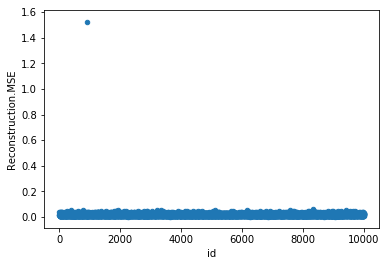

In [45]:
test_rec_error_df = test_rec_error.as_data_frame()
test_rec_error_df['id'] = test_rec_error_df.index
test_rec_error_df.plot(kind = 'scatter', x = 'id', y = 'Reconstruction.MSE')

In [46]:
test_with_error = test_with_label.cbind(test_rec_error)
outlier = test_with_error[test_with_error['Reconstruction.MSE'] > 1.0][0, :]
outlier_recon = model.predict(outlier[predictors]).cbind(outlier['Reconstruction.MSE'])

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [47]:
# Defining a helper function to plot a single digit image

def plot_digit(digit, title):
    df = digit.as_data_frame()
    #print(df[df.columns[0:784]])
    pixels = df[df.columns[predictors]].values.reshape((28, 28))
    error = df['Reconstruction.MSE'][0]
    fig = plt.figure()
    plt.title(title)
    plt.imshow(pixels, cmap='gray')
    error_caption = 'MSE: {}'.format(round(error,2))
    fig.text(.1,.1,error_caption)
    plt.show()

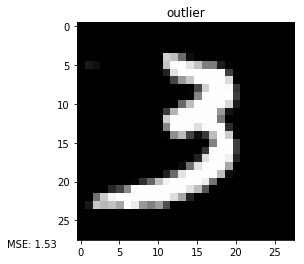

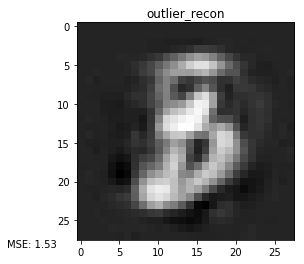

In [48]:
plot_digit(outlier, 'outlier')
plot_digit(outlier_recon, "outlier_recon")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D5A46F668>]],
      dtype=object)

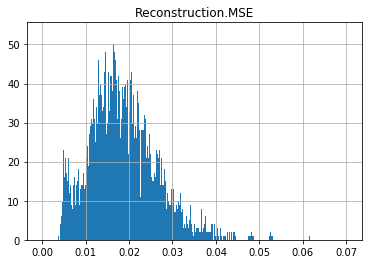

In [49]:
test_rec_error.as_data_frame().hist(bins=1000, range=[0.0, 0.07])

In [50]:
digits_of_3 = test_with_error[(test_with_error['C785']==3) & (test_with_error['Reconstruction.MSE'] < 0.02)]

In [51]:
def plot_multi_digits(digits, nx, ny, title):
    df = digits[0:(nx*ny),:].as_data_frame()
    images = [digit.reshape((28,28)) for digit in df[df.columns[predictors]].values]
    #print(df)
    errors = df['Reconstruction.MSE'].values
    fig = plt.figure()
    plt.title(title)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    for x in range(nx):
        for y in range(ny):
            index = nx*y+x
            ax = fig.add_subplot(ny, nx, index+1)
            ax.imshow(images[index],cmap='gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            error_caption = '{} - MSE : {}'.format(index,round(errors[index],2))
            ax.text(.1,.1,error_caption)

plt.show()

In [52]:
#plot_multi_digits(digits_of_3, 6, 6, "good digits of 3")
#plot_multi_digits(model.predict(digits_of_3[predictors]).cbind(digits_of_3['Reconstruction.MSE']), 6, 6, "good reconstructed digits of 3")
len(digits_of_3)

546

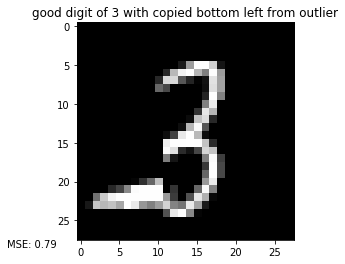

In [53]:
good_digit_of_3 = digits_of_3[1,:]
bottom_left_area = [(y*28+x) for y in range(11,28) for x in range(0,11)]
good_digit_of_3[bottom_left_area] = outlier[bottom_left_area]
good_digit_of_3['Reconstruction.MSE'] = model.anomaly(good_digit_of_3)
plot_digit(good_digit_of_3, 'good digit of 3 with copied bottom left from outlier')

### This shows the digits written correctly.

c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\h2o\utils\shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


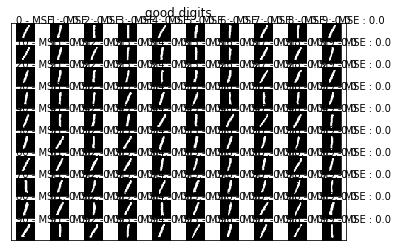

In [54]:
sorted_test_with_error_df = test_with_error.as_data_frame().sort_values(by='Reconstruction.MSE')
test_good_1 = sorted_test_with_error_df[:100]
test_good = h2o.H2OFrame(test_good_1)
plot_multi_digits(test_good,10 ,10 , 'good digits')

### These are some of the anomalies.

c:\users\charanjit\appdata\local\programs\python\python36\lib\site-packages\h2o\utils\shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


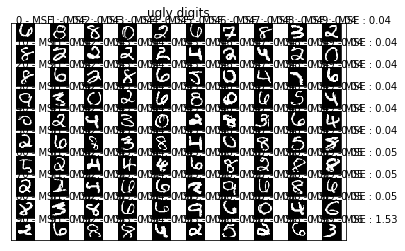

In [55]:
test_ugly_1 = sorted_test_with_error_df.tail(100)
test_ugly = h2o.H2OFrame(test_ugly_1)
plot_multi_digits(test_ugly, 10, 10, "ugly digits")

In [7]:
h2o.cluster().shutdown()